# **Project Name** - Credit Card Default Predictions

##### **Project Type**    - Classification
##### **Contribution**    - Individual
##### **Team Member**     - **Mohd Tabish Khan**

# **Project Summary -**

### This project is aimed at predicting the case of customers' default payments in Taiwan. From the perspective of risk management, the result of predictive accuracy of the estimated probability of default will be more valuable than the binary result of classification - credible or not credible clients.



 Information
This  contains information on default payments, demographic factors, credit data, history of payment, and bill statements of credit card clients in Taiwan from April 2005 to September 2005.

Content
There are 25 variables:

ID: ID of each client

LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit.

SEX: Gender (1=male, 2=female).

EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown).

MARRIAGE: Marital status (1=married, 2=single, 3=others)

AGE: Age in years

PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)

PAY_2: Repayment status in August, 2005 (scale same as above)

PAY_3: Repayment status in July, 2005 (scale same as above)

PAY_4: Repayment status in June, 2005 (scale same as above)

PAY_5: Repayment status in May, 2005 (scale same as above)

PAY_6: Repayment status in April, 2005 (scale same as above)

BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)

BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)

BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)

BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)

BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)

BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)

PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)

PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)

PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)

PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)

PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)

PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)

default payment next month: Default payment (1=yes, 0=no)

# **GitHub Link -**

# **Problem Statement**

#### Whether customer is going to default the credit card payment or not, it is necessary to bank such that it can generate much interest if credit card payment is done on time. It is a classification methodology whether they are defaulters or non-defaulters. Based on the prediction it will try to come up with strategics to both payers and non-payers to cope with such situation and limit it is risk taking ability. Such that with the help of this model building the bank can know the actual defaulters.

#### Aim:- Whether the person is going to default the credit card payment or not.

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

from datetime import datetime

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from imblearn.over_sampling import SMOTE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score


from prettytable import PrettyTable

import warnings
warnings.filterwarnings("ignore")

In [ ]:
#mounting the data set
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


###  Loading Dataset

In [ ]:
df = pd.read_excel("/content/drive/MyDrive/Colab_Notebooks/Almabetter/Module_4/Capstone Project/Supervised ML projects/Classification Project/data/default of credit card clients.xls")

### Dataset First View

In [ ]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


### Dataset Rows & Columns count

In [ ]:
#  Rows & Columns count
df.shape

(30000, 25)

### Dataset Information

In [ ]:
#  Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
df.duplicated().sum()

0

In [ ]:
print(f' We have {df.duplicated().sum()} duplicate values in .')

 We have 0 duplicate values in .


#### Missing Values/Null Values

In [ ]:
# Dataset Missing Values/Null Values Count
df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

#### There are no null or duplicate values.

Text(0.5, 1.0, 'Visualizing thr missing values')

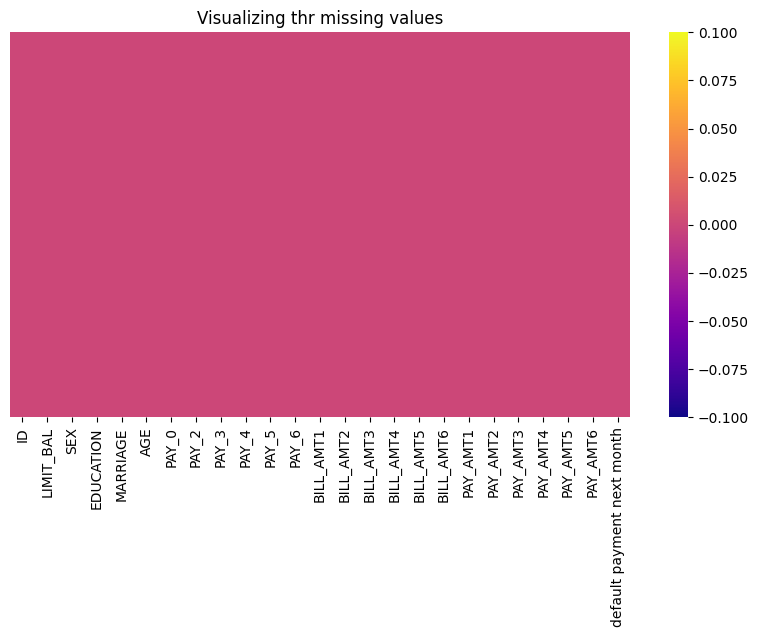

In [ ]:
# Visualizing the missing values
plt.figure(figsize = (10,5))
sns.heatmap(df.isnull(), cmap = 'plasma', annot = False, yticklabels = False)
plt.title("Visualizing thr missing values")

### What did you know about your ?

#### We have a  for Credit Card default prediction from Taiwan. We have 30000 rows with 25 columns. There are no missing or duplicate values in the data.

### Understanding your variables

In [ ]:
# Datset columns
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [ ]:
#  Describe
df.describe(include='all')

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


### Variables Description

There are 25 variables:

ID: ID of each client

LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit.

SEX: Gender (1=male, 2=female).

EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown).

MARRIAGE: Marital status (0 =  divorced, 1=married, 2=single, 3=others)

AGE: Age in years

PAY_0: Repayment status (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)

PAY_2: Repayment status in last 2 months

PAY_3: Repayment status in last 3 months

PAY_4: Repayment status in last 4 months

PAY_5: Repayment status in last 5 months

PAY_6: Repayment status in last 6 months

BILL_AMT1: Amount of bill statement in last month

BILL_AMT2: Amount of bill statement in last 2 months

BILL_AMT3: Amount of bill statement in last 3 months

BILL_AMT4: Amount of bill statement in last 4 months

BILL_AMT5: Amount of bill statement in last 5 months

BILL_AMT6: Amount of bill statement in last 6 months

PAY_AMT1: Amount of previous payment in last month

PAY_AMT2: Amount of previous payment in last 2 months

PAY_AMT3: Amount of previous payment in last 3 months

PAY_AMT4: Amount of previous payment in last 4 months

PAY_AMT5: Amount of previous payment in last 5 months

PAY_AMT6: Amount of previous payment in last 6 months

default payment next month: Default payment (1=yes, 0=no)

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
variables_df = df.columns.to_list()

In [ ]:
for i in variables_df:
  print('The Unique Values of', i, 'are:', df[i].unique())

The Unique Values of ID are: [    1     2     3 ... 29998 29999 30000]
The Unique Values of LIMIT_BAL are: [  20000  120000   90000   50000  500000  100000  140000  200000  260000
  630000   70000  250000  320000  360000  180000  130000  450000   60000
  230000  160000  280000   10000   40000  210000  150000  380000  310000
  400000   80000  290000  340000  300000   30000  240000  470000  480000
  350000  330000  110000  420000  170000  370000  270000  220000  190000
  510000  460000  440000  410000  490000  390000  580000  600000  620000
  610000  700000  670000  680000  430000  550000  540000 1000000  530000
  710000  560000  520000  750000  640000   16000  570000  590000  660000
  720000  327680  740000  800000  760000  690000  650000  780000  730000]
The Unique Values of SEX are: [2 1]
The Unique Values of EDUCATION are: [2 1 3 5 4 6 0]
The Unique Values of MARRIAGE are: [1 2 3 0]
The Unique Values of AGE are: [24 26 34 37 57 29 23 28 35 51 41 30 49 39 40 27 47 33 32 54 58 22 25 31

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
#creating list of numerical and categorical columns
numerical_columns=[]
for col in df.columns:
  if df[col].nunique()>3:
    numerical_columns.append(col)
categorical_columns=list(set(df.columns)-set(numerical_columns))

In [ ]:
print(numerical_columns)

['ID', 'LIMIT_BAL', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']


In [ ]:
print(categorical_columns)

['SEX', 'default payment next month']


### What all manipulations have you done and insights you found?

#### I have created divided the numerical and categorical variables. As we can see Education and Marriage column has multiple category so I have picked the threshhold as variables which have more than 3 not unique values should be considered categorical.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

+----------------------------+-------+
| default payment next month | Count |
+----------------------------+-------+
|             0              | 23364 |
|             1              |  6636 |
+----------------------------+-------+


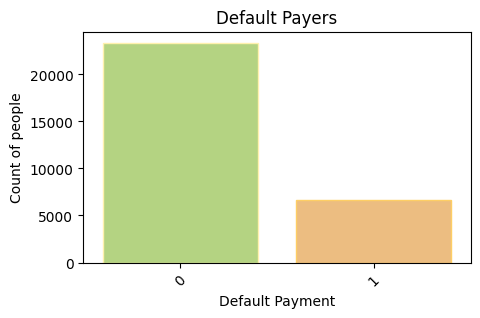

In [ ]:
# Chart 1
from prettytable import PrettyTable

default_pay = df['default payment next month'].value_counts()

table = PrettyTable()
table.field_names = ["default payment next month", "Count"]

# Add rows to the table
for value, count in default_pay.items():
    table.add_row([value, count])

# Print the table
print(table)


plt.figure(figsize=(5,3))
sns.barplot(x=default_pay.index, y=default_pay.values, palette='RdYlGn_r', edgecolor=sns.color_palette("YlOrBr", 5))
plt.xticks(rotation=45)
plt.title('Default Payers')
plt.xlabel('Default Payment')
plt.ylabel('Count of people')
plt.show()

##### 1. Why did you pick the specific chart?

Bar charts show the frequency counts of values for the different levels of a categorical or nominal variable. Sometimes, bar charts show other statistics, such as percentages.

To show the count of defaulters and non-defaulters, I have used Bar Chart.

##### 2. What is/are the insight(s) found from the chart?

##### From the bar chart we can say that 23364 are 0's and 6636 are the 1's in our Y-variable.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

##### From the above bar chart we can say that we have imbalanced dataset where 0's are more than 1's

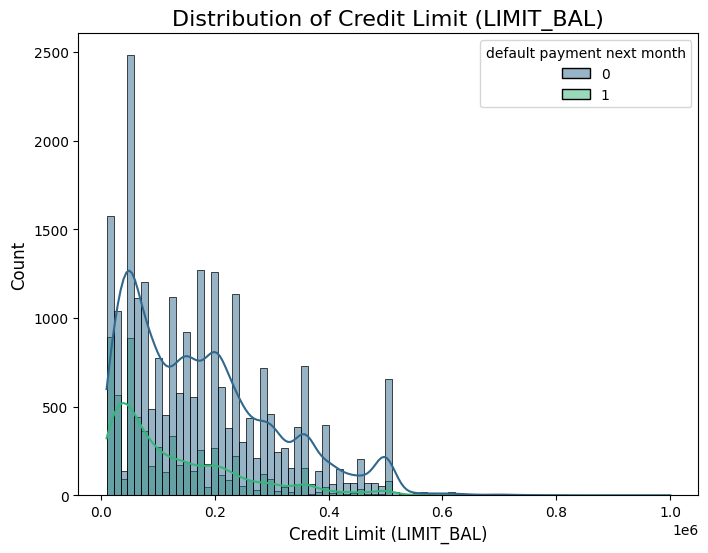

In [ ]:
# Chart 2

plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='LIMIT_BAL', hue=df["default payment next month"], kde=True, palette='viridis')
plt.title('Distribution of Credit Limit (LIMIT_BAL)', fontsize=16)
plt.xlabel('Credit Limit (LIMIT_BAL)', fontsize=12)
plt.ylabel('Count', fontsize=12)

plt.show()

##### 1. Why did you pick the specific chart?

The histogram is a popular graphing tool. It is used to summarize discrete or continuous data that are measured on an interval scale. It is often used to illustrate the major features of the distribution of the data in a convenient form. It is also useful when dealing with large data sets (greater than 100 observations). It can help detect any unusual observations (outliers) or any gaps in the data.

Thus, I used the histogram plot to analysis the variable distributions over the whole dataset whether it's symmetric or not.

##### 2. What is/are the insight(s) found from the chart?

##### It shows that the largest group of amount of credit limit is 50,000 which we also verified from early hypothesis.



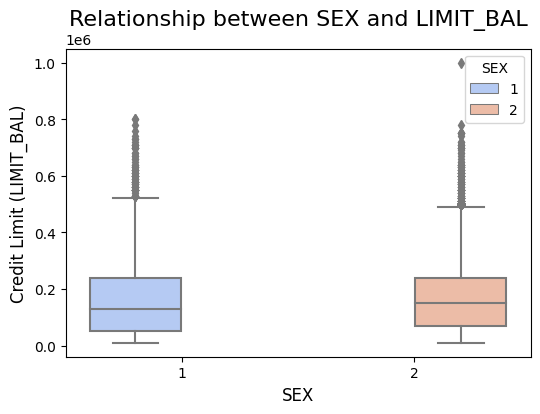

In [ ]:
# Chart 3

# Set the figure size
plt.figure(figsize=(6, 4))

# Plot the relationship using seaborn
sns.boxplot(data=df, x='SEX', y='LIMIT_BAL', hue='SEX', palette='coolwarm')

# Set the plot title and axis labels
plt.title('Relationship between SEX and LIMIT_BAL', fontsize=16)
plt.xlabel('SEX', fontsize=12)
plt.ylabel('Credit Limit (LIMIT_BAL)', fontsize=12)

# Display the plot
plt.show()

##### 1. Why did you pick the specific chart?

##### Box plots are used to show distributions of numeric data values, especially when you want to compare them between multiple groups. They are built to provide high-level information at a glance, offering general information about a group of data's symmetry, skew, variance, and outliers.

##### Thus, for SEX and LIMIT_BAL varibale in the given dataset, I used box plot to analyse the outliers and interquartile range including mean, median, maximum and minimum value.

##### 2. What is/are the insight(s) found from the chart?

##### The credit limit is quite balanced between both the genders.



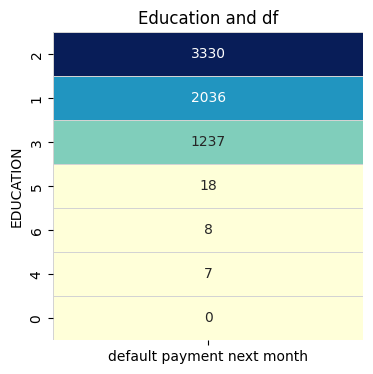

In [ ]:
# Chart - 4

education = df[['EDUCATION', 'default payment next month']].groupby(['EDUCATION'], axis=0).sum().sort_values('default payment next month', ascending=False)

plt.figure(figsize=(4,4))
plt.title('Education and df')

sns.heatmap(education, annot=True, fmt='d', cmap='YlGnBu', cbar=False, linewidths=0.5, linecolor='lightgray')
plt.show()

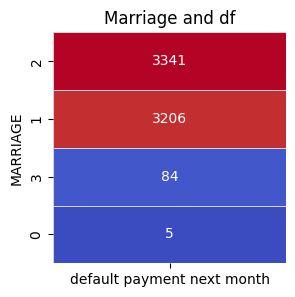

In [ ]:
# Chart 5

#Is there a connection between marriage and df?

marriage = df[['MARRIAGE', 'default payment next month']].groupby(['MARRIAGE'], axis=0).sum().sort_values('default payment next month', ascending=False)

plt.figure(figsize=(3,3))
plt.title('Marriage and df')

sns.heatmap(marriage, annot=True, fmt='d', cmap='coolwarm', cbar=False, linewidths=0.5, linecolor='lightgray')
plt.show()

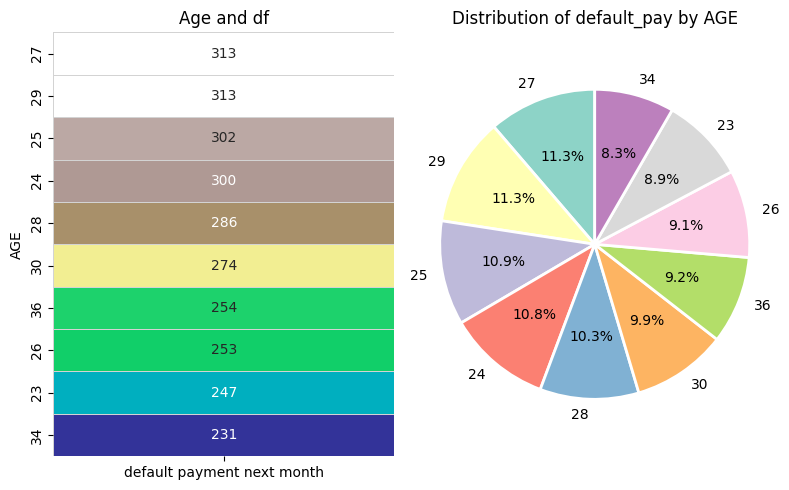

In [ ]:
# Is there a connection between people's age and df?
age = df[['AGE', 'default payment next month']].groupby(['AGE'], axis=0).sum().sort_values('default payment next month', ascending=False).head(10)

palette = "Set3"

# Create subplots with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(8, 5))

# Plot heatmap on the left subplot
axes[0].set_title('Age and df')
sns.heatmap(age, annot=True, fmt = 'd', cmap='terrain', cbar=False, linewidths=0.5, linecolor='lightgray', ax=axes[0])

# Plot pie chart on the right subplot
axes[1].set_title("Distribution of default_pay by AGE")
axes[1].pie(age["default payment next month"], labels=age.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette(palette), wedgeprops={'linewidth': 2, 'edgecolor': 'white'})
axes[1].axis("equal")  # Ensure the pie is drawn as a circle

plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

##### Bar charts show the frequency counts of values for the different levels of a categorical or nominal variable. Sometimes, bar charts show other statistics, such as percentages.

###### A pie chart expresses a part-to-whole relationship in your data. It's easy to explain the percentage comparison through area covered in a circle with different colors. Where differenet percentage comparison comes into action pie chart is used frequently. So, I used Pie chart and which helped me to get the percentage comparision of the dependant variable.

##### To show the relation between AGE, SEX, MARRIAGE and Default payment next month. I have uses the bar and pie chart.



##### 2. What is/are the insight(s) found from the chart?

##### People of graduate school, university, and high school are highly close to making deault payment.

##### It shows that single people are most likely to default followed by married people.

##### It also shows people with agre around 25 are more likely to be defaulters.

##### It shows that single people are most likely to default followed by married people.

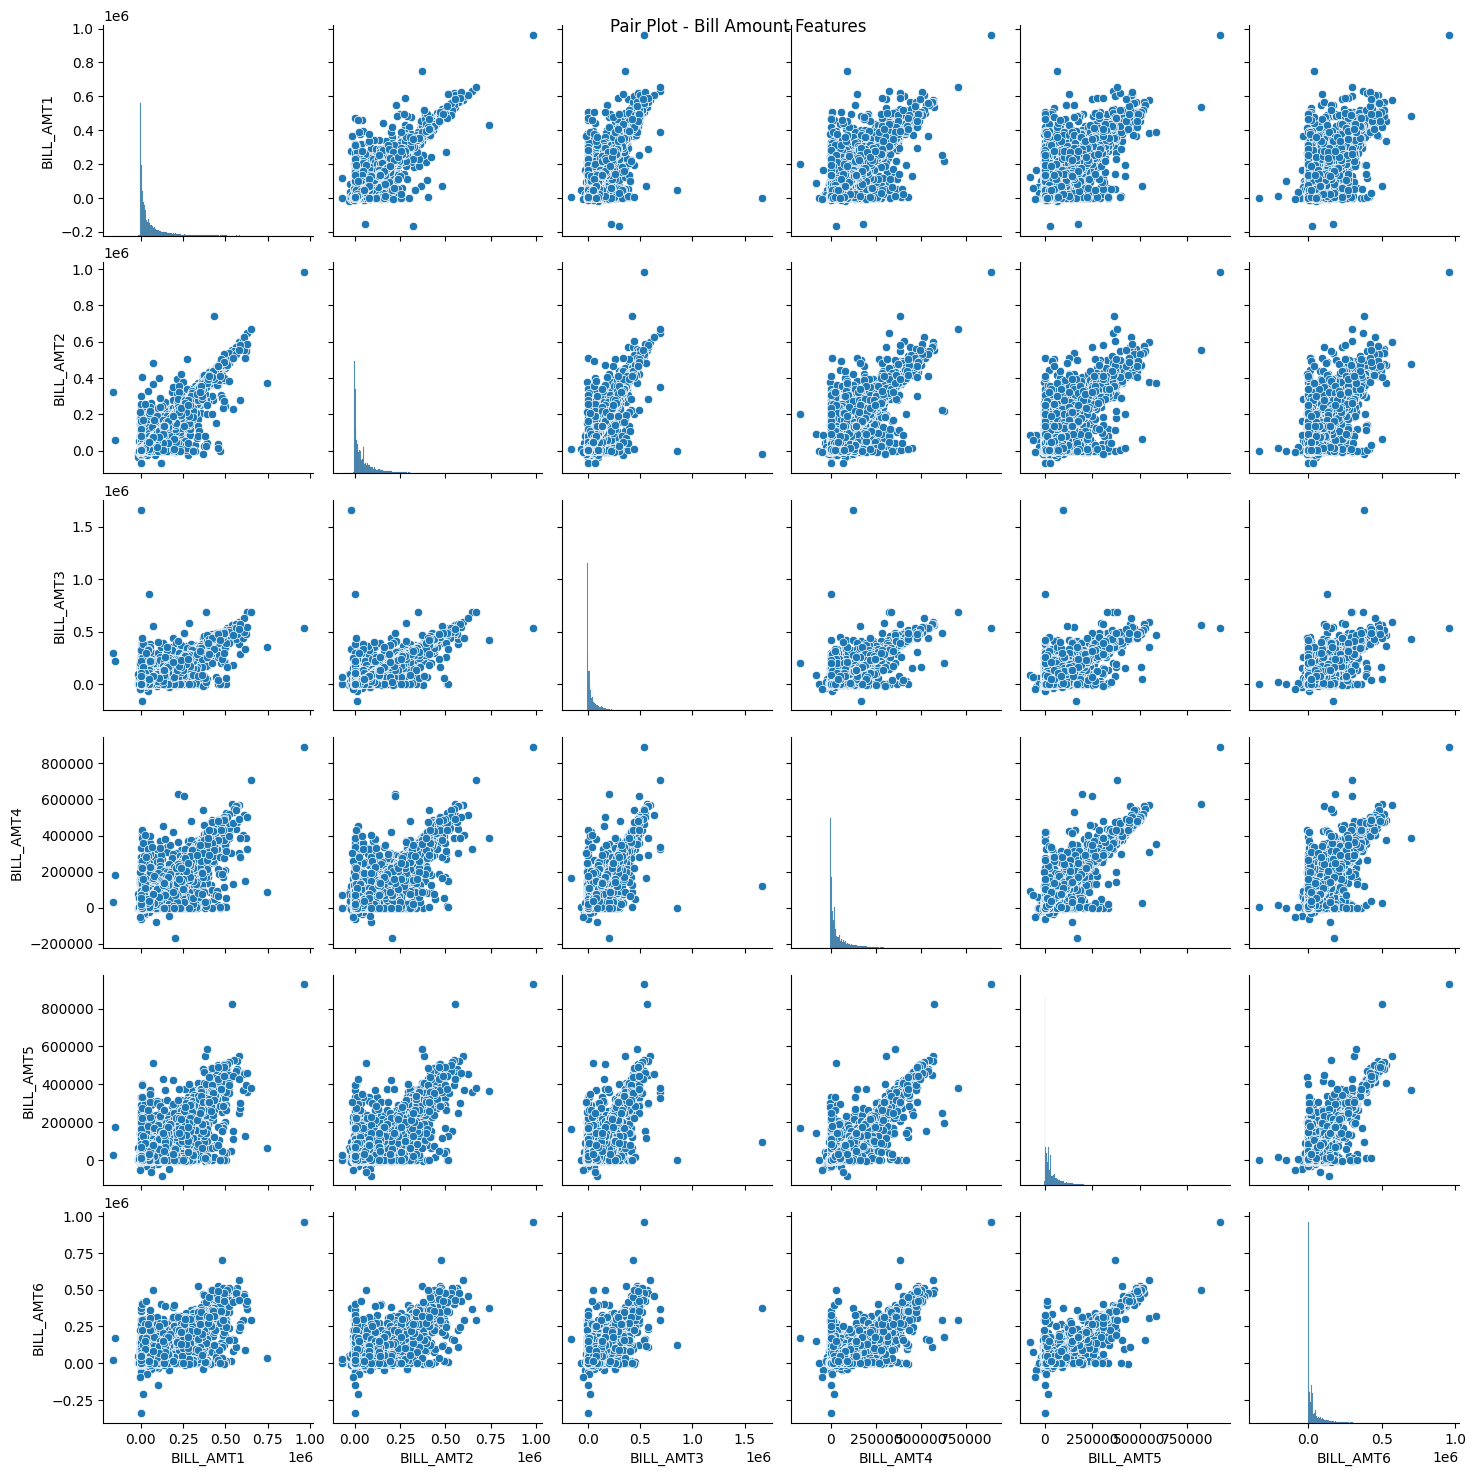

In [ ]:
# Select the bill amount columns
# Chart - 6
bill_amounts = df[['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']]

palette = "Set3"
sns.pairplot(bill_amounts, palette=palette)

plt.suptitle('Pair Plot - Bill Amount Features')
plt.show()

##### 1. Why did you pick the specific chart?

Pair plot is used to understand the best set of features to explain a relationship between two variables or to form the most separated clusters. It also helps to form some simple classification models by drawing some simple lines or make linear separation in our data-set.

Thus, I used pair plot to analyse the patterns of data and relationship between the features. It's exactly same as the correlation map but here you will get the graphical representation.

##### 2. What is/are the insight(s) found from the chart?

##### From the above pair plot, we can say that bill amount variables are related to each other as they are the same variables for the different month.

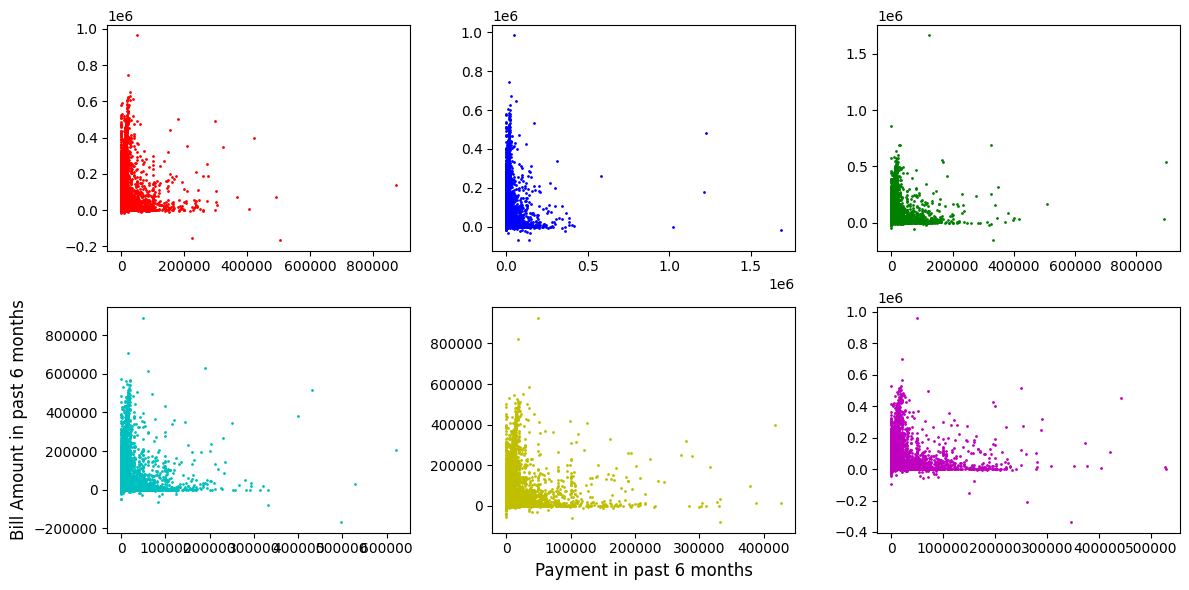

In [ ]:
#plotting the relationships between payment amount and bill amount of specific months
plt.subplots(figsize=(12, 6))

plt.subplot(231)
plt.scatter(x=df.PAY_AMT1, y=df.BILL_AMT1, c='r', s=1)

plt.subplot(232)
plt.scatter(x=df.PAY_AMT2, y=df.BILL_AMT2, c='b', s=1)

plt.subplot(233)
plt.scatter(x=df.PAY_AMT3, y=df.BILL_AMT3, c='g', s=1)

plt.subplot(234)
plt.scatter(x=df.PAY_AMT4, y=df.BILL_AMT4, c='c', s=1)
plt.ylabel("Bill Amount in past 6 months", fontsize=12)

plt.subplot(235)
plt.scatter(x=df.PAY_AMT5, y=df.BILL_AMT5, c='y', s=1)
plt.xlabel("Payment in past 6 months", fontsize=12)

plt.subplot(236)
plt.scatter(x=df.PAY_AMT6, y=df.BILL_AMT6, c='m', s=1)

plt.tight_layout()
plt.show()

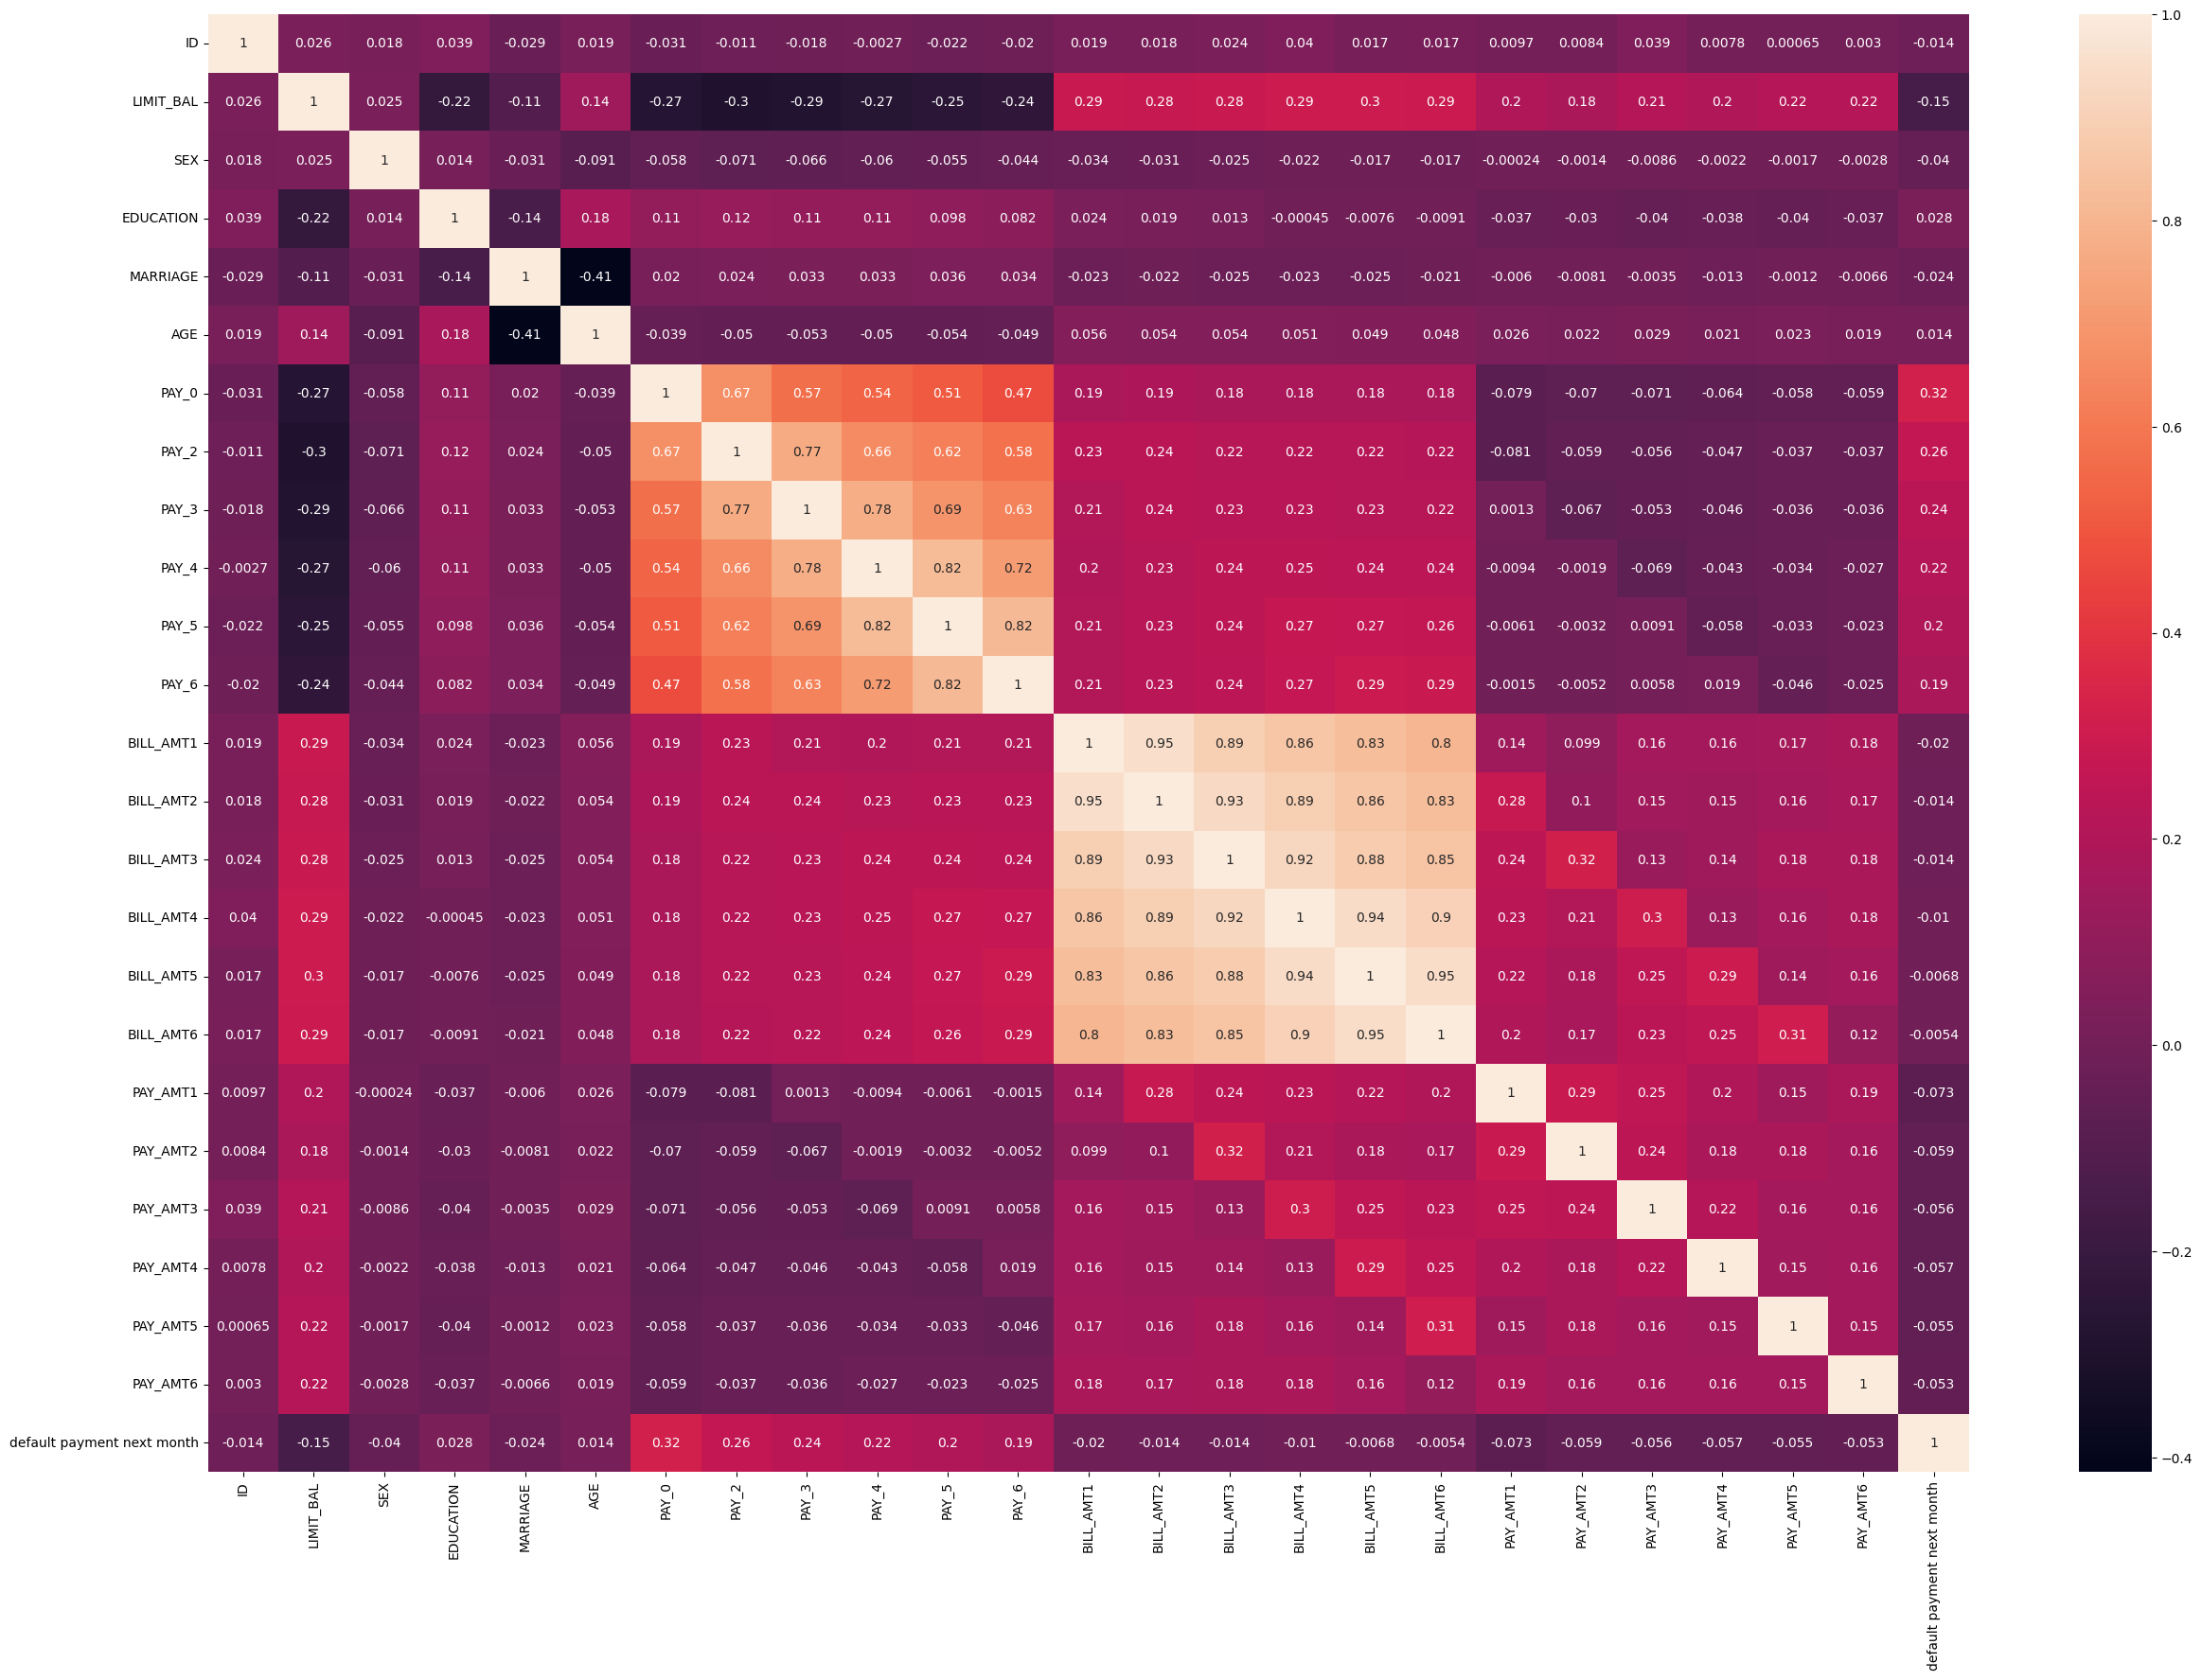

In [ ]:
plt.subplots(figsize=(30,20))
sns.heatmap(df.corr(), annot=True)
plt.show()

##### 1. Why did you pick the specific chart?



A correlation matrix is a table showing correlation coefficients between variables. Each cell in the table shows the correlation between two variables. A correlation matrix is used to summarize data, as an input into a more advanced analysis, and as a diagnostic for advanced analyses. The range of correlation is [-1,1].

Thus to know the correlation between all the variables along with the correlation coeficients, i used correlation heatmap.

##### 2. What is/are the insight(s) found from the chart?

##### From the above correlation heatmap we can see that pay columns are highly correlated with our y variable.

#### Now dividing the final  into numerical and categorical variables

In [137]:
#creating list of numerical and categorical columns
numerical_columns=['LIMIT_BAL', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
categorical_columns =  ['SEX', 'EDUCATION', 'MARRIAGE']

## ***6. Feature Engineering & Data Pre-processing***

### Missing Values

In [ ]:
df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

#### There are no missing values in the data.

### **Outlier Treatment**

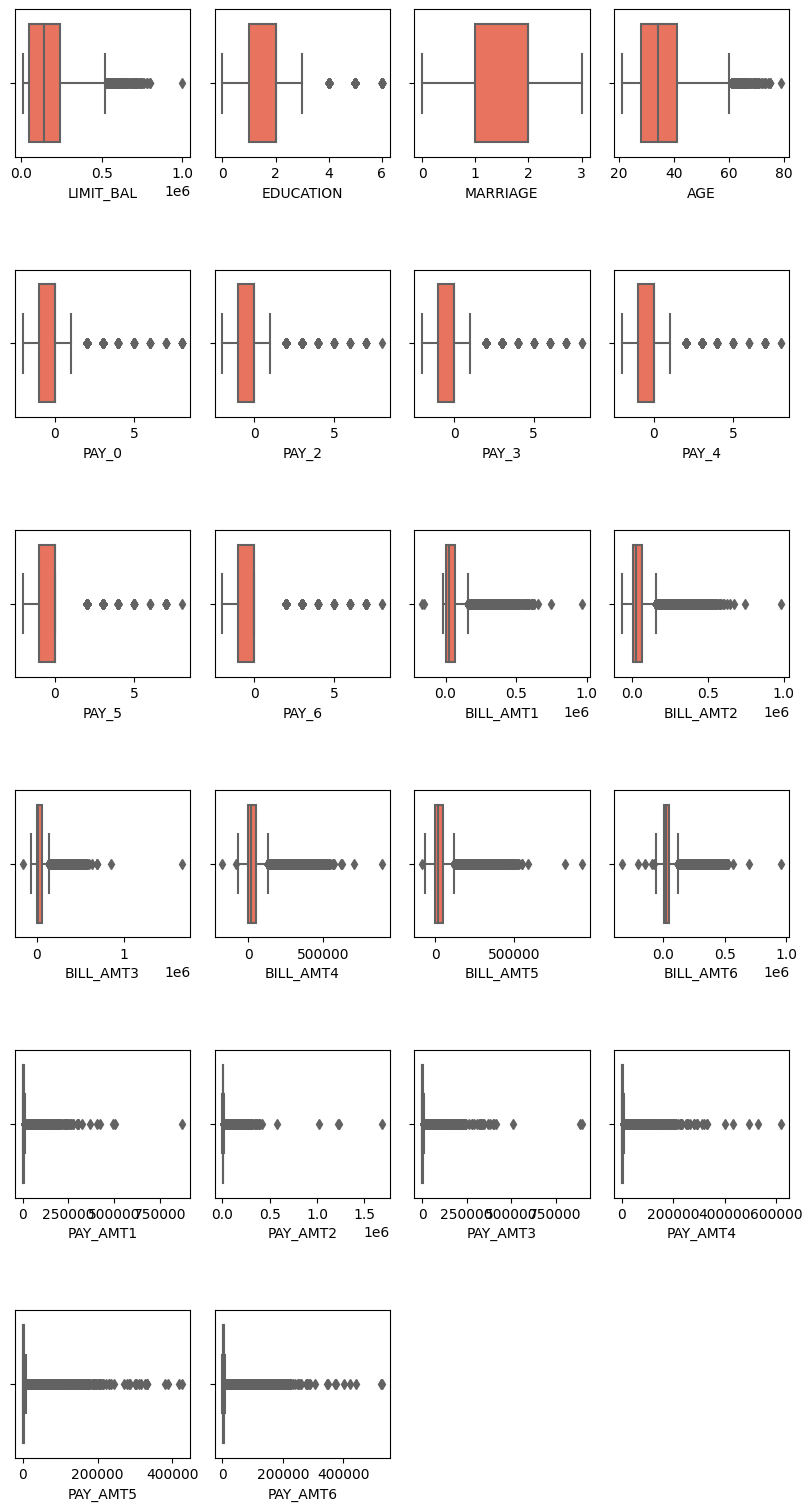

In [ ]:
# Write your code to make your  analysis ready.

#Checking for outliers

fig = plt.figure(figsize=(8,25))
c=1
for i in numerical_columns :
    plt.subplot(10, 4, c)
    plt.xlabel('Distibution of {}'.format(i))
    sns.boxplot(x=i,data=df,color="tomato")
    c = c + 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

#### There are many outliers in the numerical columns. We will handle them once we manipulate all the columns.

In [ ]:
outliers = []
def detect_outliers_iqr(data):
    data = sorted(data)
    #for column in data:
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    # print(q1, q3)
    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
    # print(lwr_bound, upr_bound)
    for i in data:
        if (i<lwr_bound or i>upr_bound):
            outliers.append(i)
    return outliers# Driver code


sample_outliers = detect_outliers_iqr(df["AGE"])


print("Outliers from IQR method: ", sample_outliers)

Outliers from IQR method:  [61, 61, 61, 61, 61, 61, 61, 61, 61, 61, 61, 61, 61, 61, 61, 61, 61, 61, 61, 61, 61, 61, 61, 61, 61, 61, 61, 61, 61, 61, 61, 61, 61, 61, 61, 61, 61, 61, 61, 61, 61, 61, 61, 61, 61, 61, 61, 61, 61, 61, 61, 61, 61, 61, 61, 61, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 66, 66, 66, 66, 66, 66, 66, 66, 66, 66, 66, 66, 66, 66, 66, 66, 66, 66, 66, 66, 66, 66, 66, 66, 66, 67, 67, 67, 67, 67, 67, 67, 67, 67, 67, 67, 67, 67, 67, 67, 67, 68, 68, 68, 68, 68, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 

### **Outlier Removal**

In [ ]:
def outlier_remover(data, column):
  for i in data[column]:
    tenth_percentile = np.percentile(data[i], 10)
    ninetieth_percentile = np.percentile(data[i], 90)
    data[i] = np.where(data[i]<tenth_percentile, tenth_percentile, data[i])
    data[i] = np.where(data[i]>ninetieth_percentile, ninetieth_percentile, data[i])
  return data

outlier_remover(df, numerical_columns)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,30000.0,2,2.0,1.0,25.0,2.0,2.0,-1.0,-1.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2.0,2.0,34.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2.0,1.0,37.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2.0,1.0,49.0,-1.0,0.0,-1.0,0.0,...,20940.0,19146.0,19131.0,2000.0,10401.1,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,1,3.0,1.0,39.0,0.0,0.0,0.0,0.0,...,88004.0,31237.0,15980.0,8500.0,10401.1,5003.0,3047.0,5000.0,1000.0,0
29996,29997,150000.0,1,3.0,2.0,43.0,-1.0,-1.0,-1.0,-1.0,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,29998,30000.0,1,2.0,2.0,37.0,2.0,2.0,2.0,-1.0,...,20878.0,20582.0,19357.0,0.0,0.0,10000.0,4200.0,2000.0,3100.0,1
29998,29999,80000.0,1,3.0,1.0,41.0,1.0,-1.0,0.0,0.0,...,52774.0,11855.0,48944.0,10300.0,3409.0,1178.0,1926.0,9500.0,1804.0,1


In [ ]:
df['AGE'] = df['AGE'].astype('int')

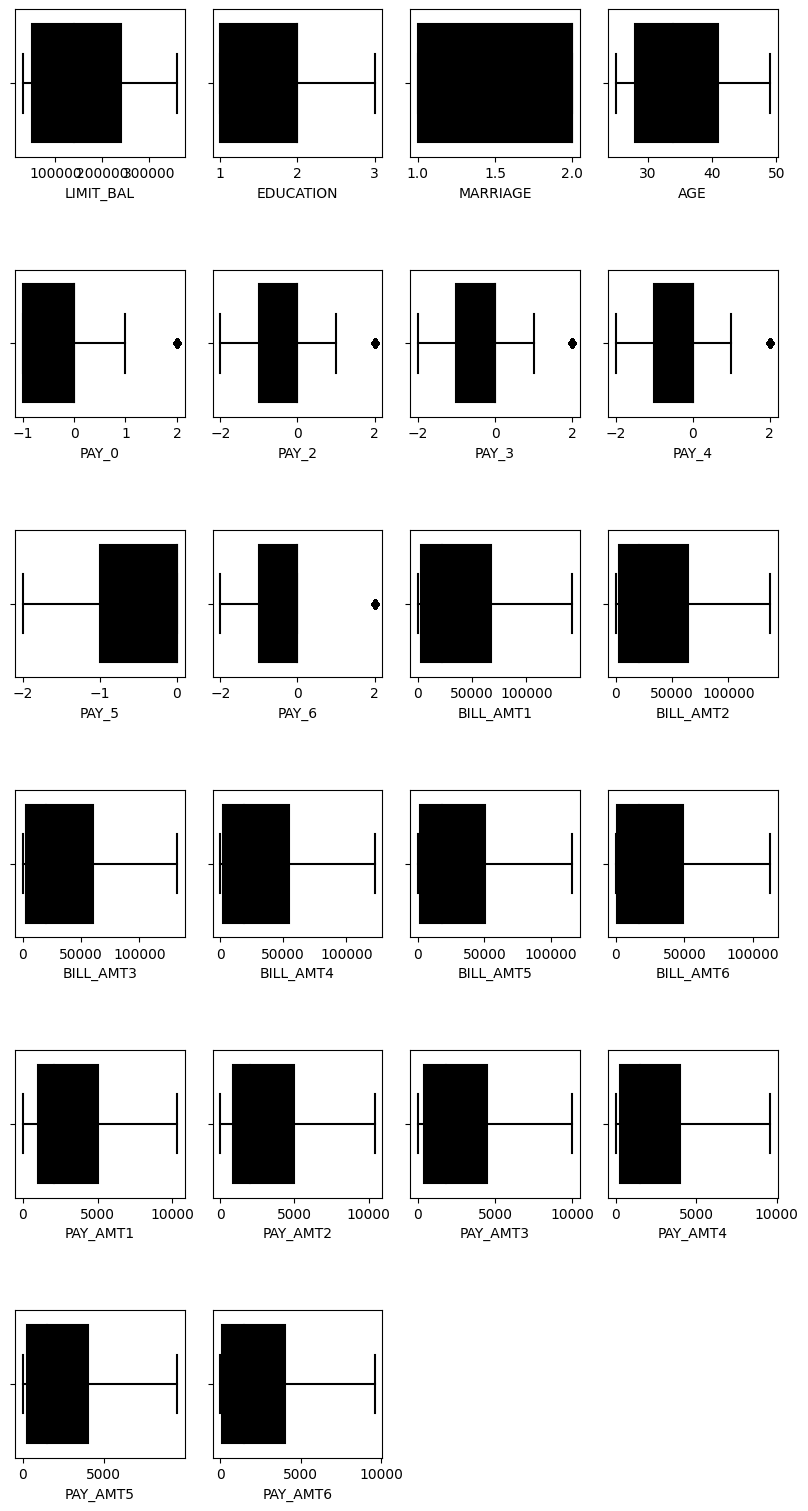

In [ ]:
#Checking for outliers

fig = plt.figure(figsize=(8,25))
c=1
for i in numerical_columns :
    plt.subplot(10, 4, c)
    plt.xlabel('Distibution of {}'.format(i))
    sns.boxplot(x=i,data=df,color="black")
    c = c + 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

#### I have removed the outlier using capping and flooring. I have capped the data at 90% and floored it at 10% so we can capture most of the data without losing the imoortant information about the data.

### **Categorical Encoding**

#### No need for categorical encoding as the categories are already encoded.

### **Feature Manipulation & Selection**

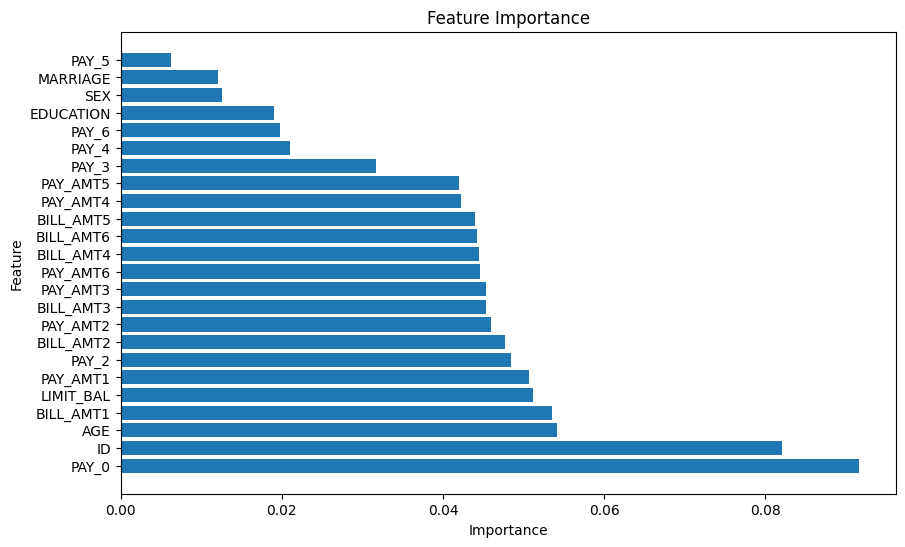

      Feature  Importance
6       PAY_0    0.091635
0          ID    0.082153
5         AGE    0.054175
12  BILL_AMT1    0.053493
1   LIMIT_BAL    0.051158
18   PAY_AMT1    0.050675
7       PAY_2    0.048445
13  BILL_AMT2    0.047733
19   PAY_AMT2    0.045941
14  BILL_AMT3    0.045318
20   PAY_AMT3    0.045306
23   PAY_AMT6    0.044611
15  BILL_AMT4    0.044425
17  BILL_AMT6    0.044177
16  BILL_AMT5    0.043997
21   PAY_AMT4    0.042295
22   PAY_AMT5    0.042037
8       PAY_3    0.031721
9       PAY_4    0.021066
11      PAY_6    0.019792
3   EDUCATION    0.019015
2         SEX    0.012622
4    MARRIAGE    0.012019
10      PAY_5    0.006189


In [ ]:
X = df.drop('default payment next month', axis=1)
y = df['default payment next month']

# Initializing the Random Forest classifier
rf = RandomForestClassifier()
rf.fit(X, y)
importances = rf.feature_importances_

feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importances = feature_importances.sort_values('Importance', ascending=False)

# Plotting the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importances['Feature'], feature_importances['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()

# Printing the feature importances
print(feature_importances)

In [ ]:
#Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [ ]:
calc_vif(df[[i for i in df.describe().columns if i not in ['default payment next month']]])

,variables,VIF
0,ID,3.960384
1,LIMIT_BAL,5.095647
2,SEX,9.723695
3,EDUCATION,8.249958
4,MARRIAGE,6.923187
5,AGE,14.428067
6,PAY_0,1.703331
7,PAY_2,3.345481
8,PAY_3,4.149140
9,PAY_4,3.992730


In [ ]:
calc_vif(df[[i for i in df.describe().columns if i not in ['default payment next month','BILL_AMT6']]])

,variables,VIF
0,ID,3.959489
1,LIMIT_BAL,5.095265
2,SEX,9.723584
3,EDUCATION,8.249159
4,MARRIAGE,6.923177
5,AGE,14.423894
6,PAY_0,1.703327
7,PAY_2,3.345154
8,PAY_3,4.149059
9,PAY_4,3.992727


In [ ]:
calc_vif(df[[i for i in df.describe().columns if i not in ['default payment next month','BILL_AMT6','BILL_AMT2']]])

,variables,VIF
0,ID,3.959488
1,LIMIT_BAL,5.091020
2,SEX,9.723482
3,EDUCATION,8.249158
4,MARRIAGE,6.923086
5,AGE,14.423630
6,PAY_0,1.701837
7,PAY_2,3.337728
8,PAY_3,4.148919
9,PAY_4,3.990912


In [ ]:
calc_vif(df[[i for i in df.describe().columns if i not in ['default payment next month','BILL_AMT6','BILL_AMT2', 'BILL_AMT4']]])

,variables,VIF
0,ID,3.946873
1,LIMIT_BAL,5.088033
2,SEX,9.723412
3,EDUCATION,8.247502
4,MARRIAGE,6.923074
5,AGE,14.423480
6,PAY_0,1.701219
7,PAY_2,3.335684
8,PAY_3,4.148203
9,PAY_4,3.979897


In [ ]:
calc_vif(df[[i for i in df.describe().columns if i not in ['default payment next month','BILL_AMT6','BILL_AMT2','BILL_AMT4','BILL_AMT3']]])

,variables,VIF
0,ID,3.946236
1,LIMIT_BAL,5.086660
2,SEX,9.723385
3,EDUCATION,8.247285
4,MARRIAGE,6.922689
5,AGE,14.423153
6,PAY_0,1.697472
7,PAY_2,3.325562
8,PAY_3,4.116121
9,PAY_4,3.979784


In [ ]:
calc_vif(df[[i for i in df.describe().columns if i not in ['default payment next month','BILL_AMT6','BILL_AMT2','BILL_AMT4','BILL_AMT3','AGE']]])

,variables,VIF
0,ID,3.839623
1,LIMIT_BAL,4.711286
2,SEX,8.975375
3,EDUCATION,5.974288
4,MARRIAGE,6.839582
5,PAY_0,1.696272
6,PAY_2,3.324649
7,PAY_3,4.115611
8,PAY_4,3.977971
9,PAY_5,4.200727


In [ ]:
calc_vif(df[[i for i in df.describe().columns if i not in ['default payment next month','BILL_AMT6','BILL_AMT2','BILL_AMT4','BILL_AMT3','AGE','BILL_AMT5']]])

,variables,VIF
0,ID,3.839611
1,LIMIT_BAL,4.676876
2,SEX,8.960607
3,EDUCATION,5.974245
4,MARRIAGE,6.839347
5,PAY_0,1.684474
6,PAY_2,3.298597
7,PAY_3,4.114172
8,PAY_4,3.972580
9,PAY_5,4.149267


In [ ]:
calc_vif(df[[i for i in df.describe().columns if i not in ['default payment next month','BILL_AMT6','BILL_AMT2','BILL_AMT4','BILL_AMT3','AGE','BILL_AMT5','SEX']]])

,variables,VIF
0,ID,3.748697
1,LIMIT_BAL,4.536123
2,EDUCATION,4.960488
3,MARRIAGE,5.632795
4,PAY_0,1.683674
5,PAY_2,3.298206
6,PAY_3,4.114157
7,PAY_4,3.972468
8,PAY_5,4.100094
9,PAY_6,2.883601


In [ ]:
calc_vif(df[[i for i in df.describe().columns if i not in ['default payment next month','BILL_AMT6','BILL_AMT2','BILL_AMT4','BILL_AMT3','AGE','BILL_AMT5','SEX','MARRIAGE']]])

,variables,VIF
0,ID,3.487399
1,LIMIT_BAL,4.436989
2,EDUCATION,3.828260
3,PAY_0,1.680743
4,PAY_2,3.297441
5,PAY_3,4.113338
6,PAY_4,3.971621
7,PAY_5,4.010421
8,PAY_6,2.879499
9,BILL_AMT1,3.299381


In [ ]:
df_new = df[["LIMIT_BAL", "EDUCATION", "BILL_AMT1", "PAY_0","PAY_2", "PAY_3", "PAY_4", "PAY_5", "PAY_6",'PAY_AMT1','PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', "default payment next month"]]


In [ ]:
X = df_new.drop("default payment next month", axis = 1)
y = df_new["default payment next month"]

### Handling Imbalanced Dataset

In [ ]:
from sklearn.utils import resample

# Separate majority and minority classes
df_majority = df_new[df_new['default payment next month']==0]
df_minority = df_new[df_new['default payment next month']==1]

# Upsample minority class
df_minority_upsampled = resample(df_minority,
                                 replace=True,     # sample with replacement
                                 n_samples=len(df_majority),    # to match majority class
                                 random_state=1234) # reproducible results

# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])

# Display new class counts
df_upsampled['default payment next month'].value_counts()

0    23364
1    23364
Name: default payment next month, dtype: int64

#### I have used the upsampling method to increase the number of 1's in the data as it was an imbalanced dataset.

In [ ]:
X = df_upsampled.drop('default payment next month', axis = 1)
y = df_upsampled['default payment next month']

#### Scaling and transforming the dataset

In [ ]:
scaler = MinMaxScaler()
scaler = scaler.fit(X)
X_transform = scaler.transform(X)

In [ ]:
#setting up testing and training sets
X_train, X_test, y_train, y_test = train_test_split(X_transform, y, test_size=0.20, random_state=27)

# Getting the shape of Train Test set.

print("Training Dataset Shape:--")
print("X_train shape ", X_train.shape)
print("Y_train shape ", y_train.shape)
print("Testing Dataset Shape:--")
print("X_test shape ",X_test.shape)
print("Y_test shape ",y_test.shape)


Training Dataset Shape:--
X_train shape  (37382, 15)
Y_train shape  (37382,)
Testing Dataset Shape:--
X_test shape  (9346, 15)
Y_test shape  (9346,)


# **ML Implementation**

### Model 1 - Logistic Regression

In [ ]:
# ML Model - 1 Implementation
log_reg = LogisticRegression()

# Fit the algorithm
log_reg = log_reg.fit(X_train, y_train)

# get the predicted classes
logistic_train_class = log_reg.predict(X_train)
logistic_test_class = log_reg.predict(X_test)


In [ ]:
# get the predicted probabilities
logistic_train_prob = log_reg.predict_proba(X_train)
logistic_test_prob = log_reg.predict_proba(X_test)

# calculating accuracy on train and test set
logistic_train_acc = accuracy_score(y_train, logistic_train_class)
logistic_test_acc = accuracy_score(y_test, logistic_test_class)

print("\n")
print("The accuracy on test dataset is", logistic_test_acc)
print("\n")

# calculating precision and recall on the test set
log_precision = precision_score(y_test, logistic_test_class, average='weighted')
print("The precision on test dataset is", log_precision)

log_recall = recall_score(y_test, logistic_test_class, average='weighted')
print("The recall on test dataset is", log_recall)

# calculating roc_auc_score on the test set
log_roc = roc_auc_score(y_test, logistic_test_class, multi_class='ovo', average='weighted')
print("The roc auc score on test dataset is", log_roc)



The accuracy on test dataset is 0.6899208217419217


The precision on test dataset is 0.6985427760972257
The recall on test dataset is 0.6899208217419217
The roc auc score on test dataset is 0.6907832235292222


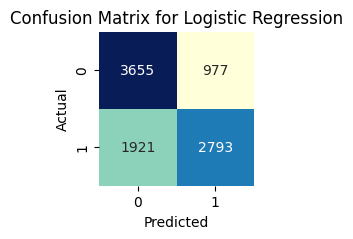

In [ ]:
# Define a function to plot the confusion matrix
def plot_confusion_matrix(y_true, y_pred, labels, model_name):
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    plt.figure(figsize=(2,2))
    sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu', cbar=False)
    plt.title('Confusion Matrix for ' + model_name)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.xticks(ticks=np.arange(len(labels))+0.5, labels=labels)
    plt.yticks(ticks=np.arange(len(labels))+0.5, labels=labels)
    plt.show()

# Plotting the confusion matrix and classification report for each model
plot_confusion_matrix(y_test, logistic_test_class, labels=[0, 1], model_name = "Logistic Regression")

# **Model-2: Random Forest Classifier**

In [ ]:
# ML Model implementation
# Initialize the model
rf = RandomForestClassifier()

# Fit the Model
rf.fit(X_train, y_train)

# Predict the Model
rf_pred = rf.predict(X_test)

In [ ]:
# get the predicted probabilities
rf_train_prob = rf.predict_proba(X_train)
rf_test_prob = rf.predict_proba(X_test)

# get the predicted classes
rf_train_class = rf.predict(X_train)
rf_test_class = rf.predict(X_test)

# calculating accuracy on train and test set
rf_train_acc = accuracy_score(y_train, rf_train_class)
rf_test_acc = accuracy_score(y_test, rf_test_class)

print("\n")
print("The accuracy on test dataset is", rf_test_acc)
print("\n")

# calculating precision and recall on the test set
rf_precision = precision_score(y_test, rf_test_class, average='weighted')
print("The precision on test dataset is", rf_precision)

rf_recall = recall_score(y_test, rf_test_class, average='weighted')
print("The recall on test dataset is", rf_recall)

# calculating roc_auc_score on the test set
rf_roc = roc_auc_score(y_test, rf_test_class, multi_class='ovo', average='weighted')
print("The roc auc score on test dataset is", rf_roc)



The accuracy on test dataset is 0.9253156430558528


The precision on test dataset is 0.9269210399256866
The recall on test dataset is 0.9253156430558528
The roc auc score on test dataset is 0.9250376272346437


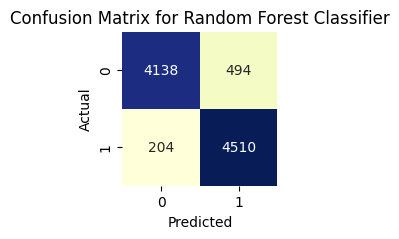

In [ ]:
# Plotting the confusion matrix and classification report for each model
plot_confusion_matrix(y_test, rf_test_class, labels=[0, 1], model_name = "Random Forest Classifier")

In [ ]:
param_grid = {
    'n_estimators': [50,60,70,80,90,100],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}
CV_rf = GridSearchCV(estimator=rf, param_grid=param_grid, cv= 5)
CV_rf.fit(X_train, y_train)
print(CV_rf.best_params_)

{'criterion': 'gini', 'max_depth': 8, 'max_features': 'sqrt', 'n_estimators': 60}


In [ ]:
# get the predicted probabilities
CV_rf_train_prob = CV_rf.predict_proba(X_train)
CV_rf_test_prob = CV_rf.predict_proba(X_test)

# get the predicted classes
CV_rf_train_class = CV_rf.predict(X_train)
CV_rf_test_class = CV_rf.predict(X_test)

# calculating accuracy on train and test set
CV_rf_train_acc = accuracy_score(y_train, CV_rf_train_class)
CV_rf_test_acc = accuracy_score(y_test, CV_rf_test_class)

print("The accuracy on test dataset is", CV_rf_test_acc)
print("\n")

# calculating precision and recall on the test set
CV_rf_precision = precision_score(y_test, CV_rf_test_class, average='weighted')
print("The precision on test dataset is", CV_rf_precision)

CV_rf_recall = recall_score(y_test, CV_rf_test_class, average='weighted')
print("The recall on test dataset is", CV_rf_recall)

# calculating roc_auc_score on the test set
CV_rf_roc = roc_auc_score(y_test, CV_rf_test_class, multi_class='ovo', average='weighted')
print("The roc auc score on test dataset is", CV_rf_roc)


The accuracy on test dataset is 0.7250160496469078


The precision on test dataset is 0.7331434052074971
The recall on test dataset is 0.7250160496469078
The roc auc score on test dataset is 0.7257929014591453


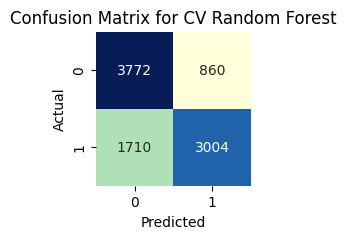

In [ ]:
# Plotting the confusion matrix and classification report for each model
plot_confusion_matrix(y_test, CV_rf_test_class, labels=[0, 1], model_name = "CV Random Forest")

##### Which hyperparameter optimization technique have you used and why?

##### I have used the GridSearchCV optimization technique as it splits the data further and find the best fit model.

##### Have you seen any improvement? Note down the improvement with updates

##### Yes, it have removed the problem of overfitting along with giving the following:

##### Low precision, recall and roc_auc_score

#### 3. Explain each evaluation metric's indication towards business and the business impact of the ML model used.

##### Accuracy is the metric which is having business impact of the model used as we need max accuracy for the prediction as it might be possible that we can create type 1 or type 2 hypothetical test error.

# **Model - 3: XGBoost Classifier**

In [ ]:
# Initializing the models
xgb_classifier = xgb.XGBClassifier()

# Training the models
xgb_classifier.fit(X_train, y_train)

# Predicting the models
xgb_pred = xgb_classifier.predict(X_test)


In [ ]:
# get the predicted probabilities
xgb_classifier_train_prob = xgb_classifier.predict_proba(X_train)
xgb_classifier_test_prob = xgb_classifier.predict_proba(X_test)

# get the predicted classes
xgb_classifier_train_class = xgb_classifier.predict(X_train)
xgb_classifier_test_class = xgb_classifier.predict(X_test)

# calculating accuracy on train and test set
xgb_classifier_train_acc = accuracy_score(y_train, xgb_classifier_train_class)
xgb_classifier_test_acc = accuracy_score(y_test, xgb_classifier_test_class)

print("The accuracy on test dataset is", xgb_classifier_test_acc)
print("\n")

# calculating precision and recall on the test set
xgb_classifier_precision = precision_score(y_test, xgb_classifier_test_class, average='weighted')
print("The precision on test dataset is", rf_precision)

xgb_classifier_recall = recall_score(y_test, xgb_classifier_test_class, average='weighted')
print("The recall on test dataset is", xgb_classifier_recall)

# calculating roc_auc_score on the test set
xgb_classifier_roc = roc_auc_score(y_test, xgb_classifier_test_class, multi_class='ovo', average='weighted')
print("The roc auc score on test dataset is", xgb_classifier_roc)

The accuracy on test dataset is 0.8055852771239033


The precision on test dataset is 0.9269210399256866
The recall on test dataset is 0.8055852771239033
The roc auc score on test dataset is 0.8055881481172094


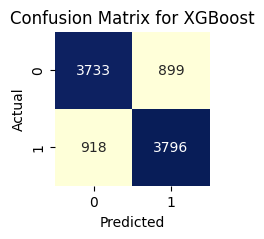

In [ ]:
# Plotting the confusion matrix and classification report for each model
plot_confusion_matrix(y_test, xgb_classifier_test_class, labels=[0, 1], model_name = "XGBoost")

In [ ]:
params = {"learning_rate": (0.05, 0.10, 0.15),
                        "max_depth": [ 3, 4, 5, 6, 8],
                        "min_child_weight": [ 1, 3, 5, 7],
                        "gamma":[ 0.0, 0.1, 0.2],
                        "colsample_bytree":[ 0.3, 0.4]}

CV_xgb_classifier = GridSearchCV(estimator = xgb_classifier,param_grid = params)
CV_xgb_classifier.fit(X_train,y_train)
print (CV_xgb_classifier.best_params_)

In [ ]:
print (CV_xgb_classifier.best_params_)

{'colsample_bytree': 0.4, 'gamma': 0.2, 'learning_rate': 0.15, 'max_depth': 8, 'min_child_weight': 1}


In [ ]:
# get the predicted probabilities
CV_xgb_classifier_train_prob = CV_xgb_classifier.predict_proba(X_train)
CV_xgb_classifier_test_prob = CV_xgb_classifier.predict_proba(X_test)

# get the predicted classes
CV_xgb_classifier_train_class = CV_xgb_classifier.predict(X_train)
CV_xgb_classifier_test_class = CV_xgb_classifier.predict(X_test)

# calculating accuracy on train and test set
CV_xgb_classifier_train_acc = accuracy_score(y_train, CV_xgb_classifier_train_class)
CV_xgb_classifier_test_acc = accuracy_score(y_test, CV_xgb_classifier_test_class)

print("\n")
print("The accuracy on test dataset is", CV_xgb_classifier_test_acc)
print("\n")

# calculating precision and recall on the test set
CV_xgb_classifier_precision = precision_score(y_test, CV_xgb_classifier_test_class, average='weighted')
print("The precision on test dataset is", rf_precision)

CV_xgb_classifier_recall = recall_score(y_test, CV_xgb_classifier_test_class, average='weighted')
print("The recall on test dataset is", CV_xgb_classifier_recall)

# calculating roc_auc_score on the test set
CV_xgb_classifier_roc = roc_auc_score(y_test, CV_xgb_classifier_test_class, multi_class='ovo', average='weighted')
print("The roc auc score on test dataset is", CV_xgb_classifier_roc)



The accuracy on test dataset is 0.8136101005777873


The precision on test dataset is 0.9269210399256866
The recall on test dataset is 0.8136101005777873
The roc auc score on test dataset is 0.8136877584353519


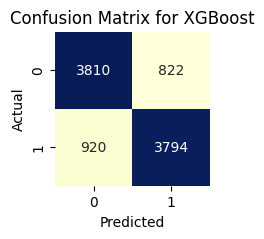

In [ ]:
# Plotting the confusion matrix and classification report for each model
plot_confusion_matrix(y_test, CV_xgb_classifier_test_class, labels=[0, 1], model_name = "XGBoost")

##### Which hyperparameter optimization technique have you used and why?

##### I have used the GridSearchCV optimization technique as it splits the data further and find the best fit model.

##### Have you seen any improvement? Note down the improvement with updates

##### Not much improvement.

#### 3. Explain each evaluation metric's indication towards business and the business impact of the ML model used.

##### Accuracy is the metric which is having business impact of the model used as we need max accuracy for the prediction as it might be possible that we can create type 1 or type 2 hypothetical test error.

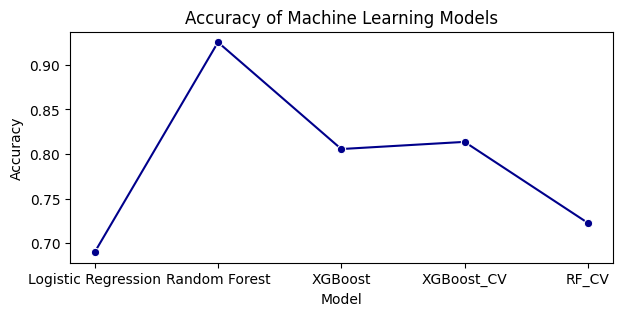

In [ ]:
# Plotting the accuracies
models = ['Logistic Regression', 'Random Forest', 'XGBoost', 'XGBoost_CV','RF_CV']
accuracies = [logistic_test_acc,rf_test_acc, xgb_classifier_test_acc,CV_xgb_classifier_test_acc, CV_rf_test_acc]

plt.figure(figsize=(7,3))
sns.lineplot(x=models, y=accuracies, marker='o', color='darkblue')
plt.title('Accuracy of Machine Learning Models')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.show()

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File
import pickle
with open('model.pkl','wb') as f:
    pickle.dump(rf, f)

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.

In [ ]:
# Load the File and predict unseen data.

with open('model.pkl', 'rb') as f:
    clf2 = pickle.load(f)


clf2.predict(X_test[5:10])

array([0, 1, 1, 0, 1])

# **Conclusion**

Based on the exploratory data analysis, we discover that human characteristics are not the most important predictors of default, the payment status of the most 2 months and credit limit

From the modeling, we are able to classify default risk with accessible customer data and find a decent model. Using a Logistic Regression classifier, we can predict with 68% accuracy, whether a customer is likely to default next month. Using a Random Forest classifier, we can predict with 92% accuracy, whether a customer is likely to default next month. Using a XG BOOST classifier, we can predict with 80% accuracy, whether a customer is likely to default next month.

If the balance of recall and precision is the most important metric, then Random Forest is the ideal model.